## Preprocessing

Here we prepare data as follows:
- All the wav files are in the unified format.
- Convert them to melspectrogram on-memory data.


In [1]:
ORGDATADIR = '../../dataset/speech_commands_v0.01'
DATADIR =  './16kmono_scd'
DATASET_PREFIX = 'scd_'

import os, sys
sys.path.append('common')
import util, audio_preprocessing
%matplotlib inline

all_files = util.list_files(os.path.join(ORGDATADIR, '*/*.wav'))
# Data Loading
all_unifiles = [f.replace(ORGDATADIR, DATADIR) for f in all_files]

In [2]:
print(os.path.dirname(all_unifiles[0]), all_unifiles[0])

./16kmono_scd/five ./16kmono_scd/five/264f471d_nohash_3.wav


In [3]:
# Convert all the original data and write to DATADIR folder.

for f in all_files:
    a = audio_preprocessing.librosa_load_audio_as_mono(f)
    targ = f.replace(ORGDATADIR, DATADIR)
    util.ensure_folder(os.path.dirname(targ))
    audio_preprocessing.write_audio(targ, a, audio_preprocessing.default_sampling_rate)

### Preprocess files to on-memory data

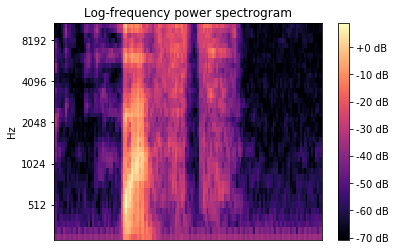

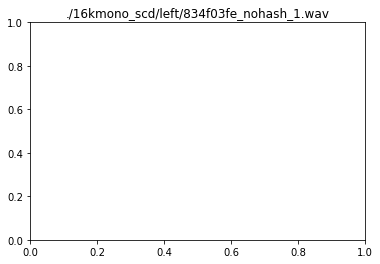

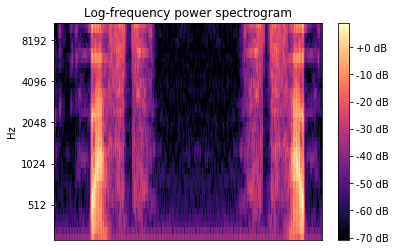

In [11]:
# Test
a_file = './16kmono_scd/left/834f03fe_nohash_1.wav'
x, sr = audio_preprocessing.read_audio(a_file, sr= audio_preprocessing.default_sampling_rate)
mels = audio_preprocessing.wavfile_to_melspectrogram(a_file, debug_display=True)
mels2 = util.unify_2d_length(mels, 256)
audio_preprocessing.show_melspectrogram(mels2)

In [5]:
import numpy as np

traindata = util.load_txt_list(os.path.join('.', DATASET_PREFIX+'trainset.txt'))
valdata = util.load_txt_list(os.path.join('.', DATASET_PREFIX+'validationset.txt'))
testdata = util.load_txt_list(os.path.join('.', DATASET_PREFIX+'testset.txt'))
classes = util.load_txt_list(os.path.join('.', DATASET_PREFIX+'classes.txt'))
cls2name = {i:classes[i] for i in range(len(classes))}
name2cls = {classes[i]:i for i in range(len(classes))}

def convert_dataset_process1(datalist):
    xylist = [(name2cls[datalist[k].split('/')[0]], os.path.join(DATADIR, datalist[k]))
                    for k in range(len(datalist))]
    Xs = [audio_preprocessing.wavfile_to_melspectrogram(xy[1]) for xy in xylist]
    ys = np.array([xy[0] for xy in xylist])
    return Xs, ys

def convert_dataset_process2(Xss):
    uni_length = util.get_2d_mode_length(util.flatten_list(Xss))
    return [np.array([util.unify_2d_length(x, uni_length) for x in Xs]) for Xs in Xss]

X_train, y_train = convert_dataset_process1(traindata)
X_valid, y_valid = convert_dataset_process1(valdata)
X_test, y_test = convert_dataset_process1(testdata)
X_train, X_valid, X_test = convert_dataset_process2([X_train, X_valid, X_test])

In [6]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((51088, 40, 138),
 (6798, 40, 138),
 (6835, 40, 138),
 (51088,),
 (6798,),
 (6835,))

In [7]:
np.save(DATASET_PREFIX+'X_train.npy', X_train)
np.save(DATASET_PREFIX+'y_train.npy', y_train)
np.save(DATASET_PREFIX+'X_valid.npy', X_valid)
np.save(DATASET_PREFIX+'y_valid.npy', y_valid)
np.save(DATASET_PREFIX+'X_test.npy', X_test)
np.save(DATASET_PREFIX+'y_test.npy', y_test)

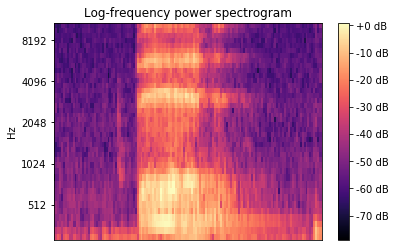

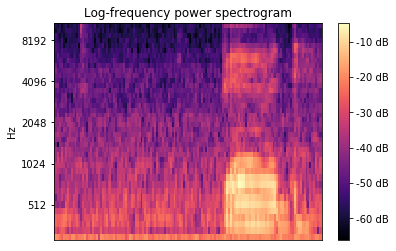

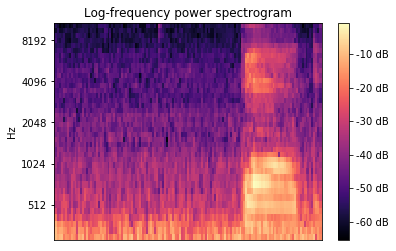

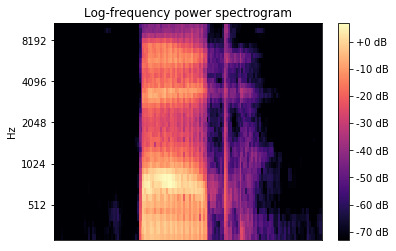

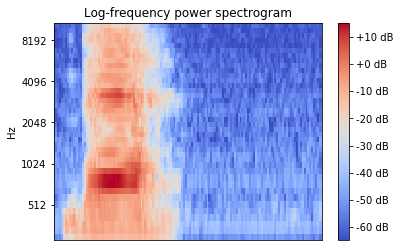

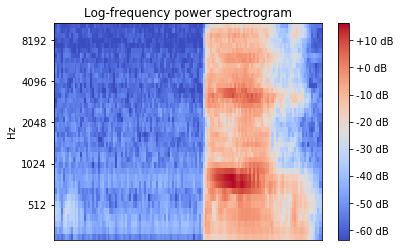

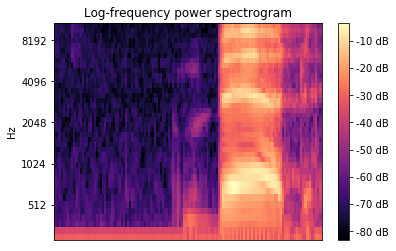

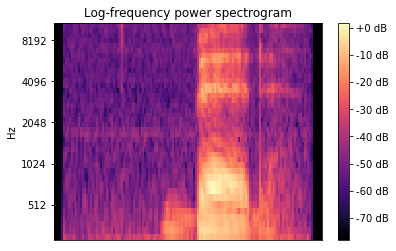

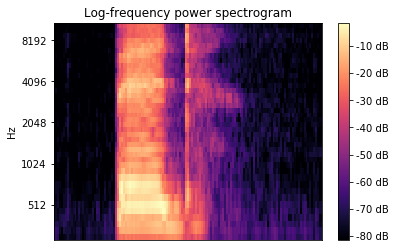

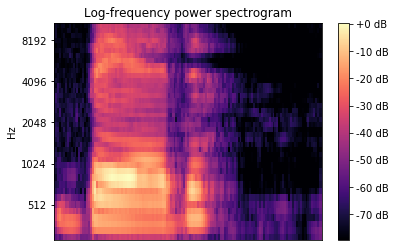

In [8]:
import matplotlib.pyplot as plt
for mels in X_valid[:10]:
    audio_preprocessing.show_melspectrogram(mels)
    plt.show()

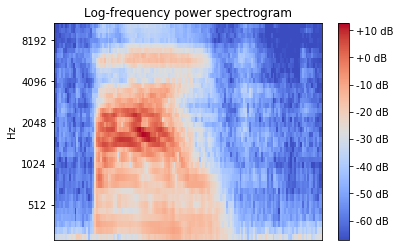

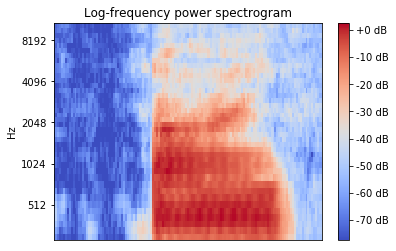

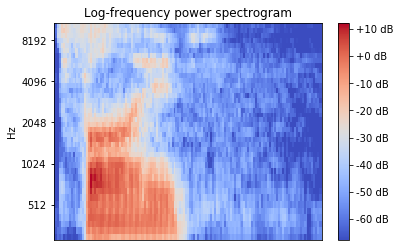

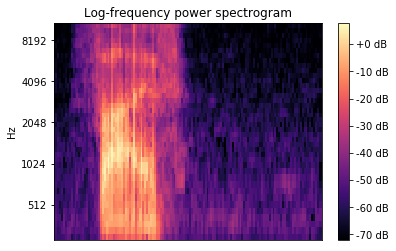

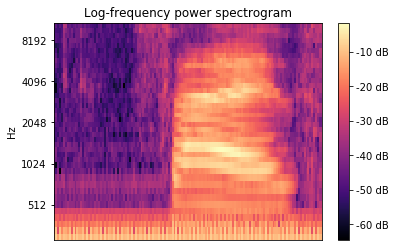

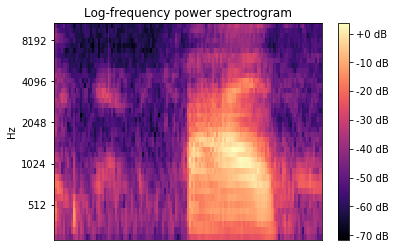

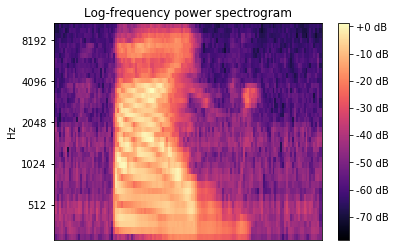

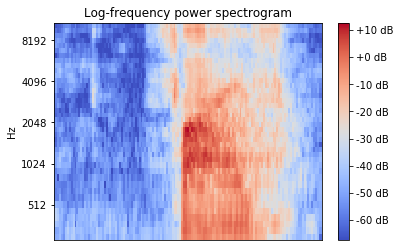

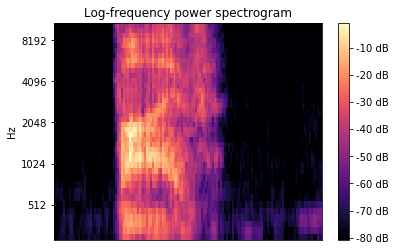

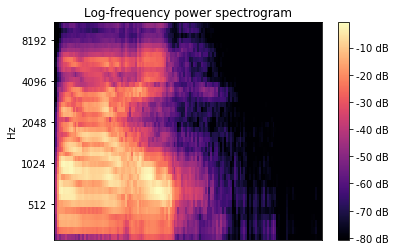

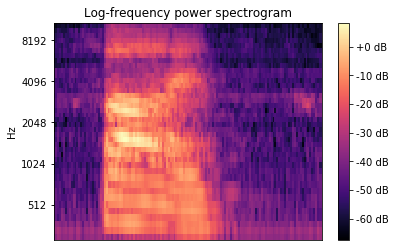

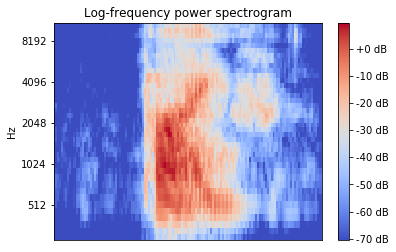

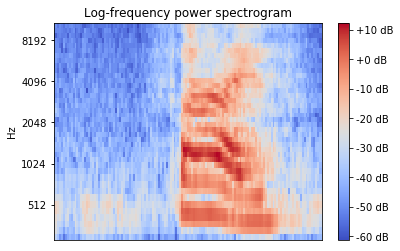

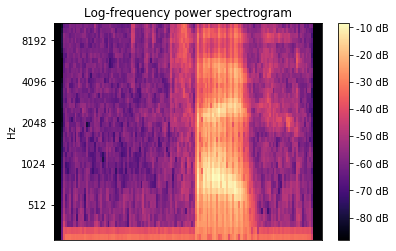

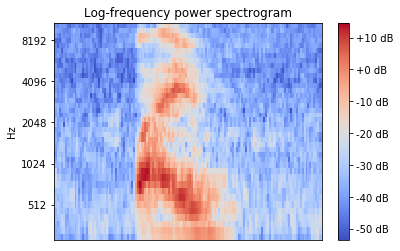

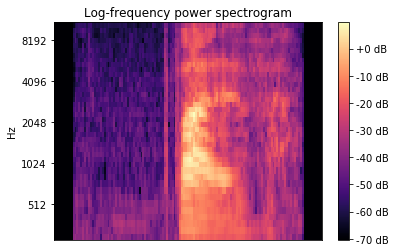

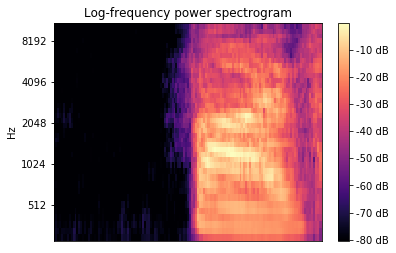

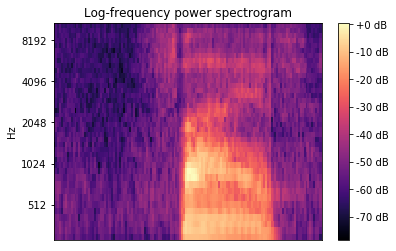

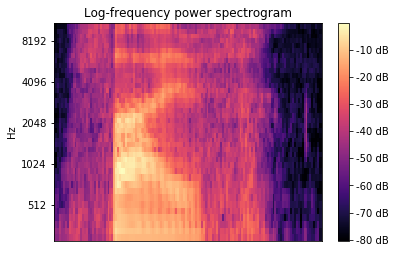

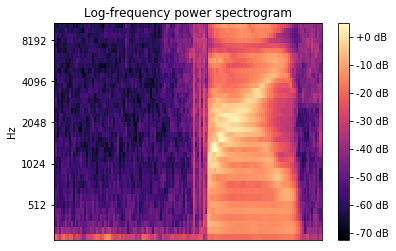

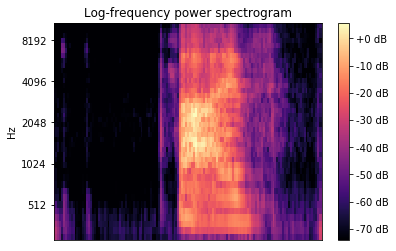

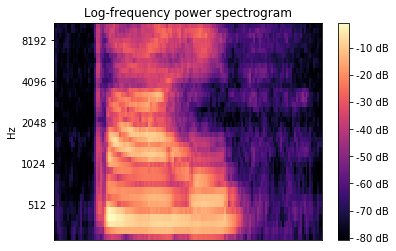

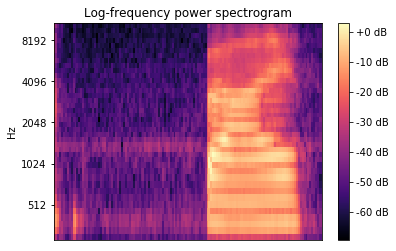

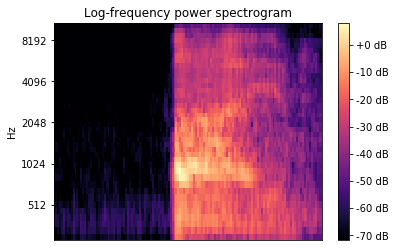

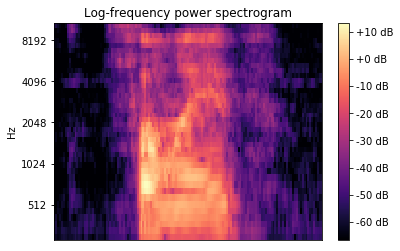

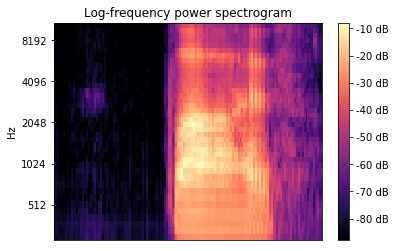

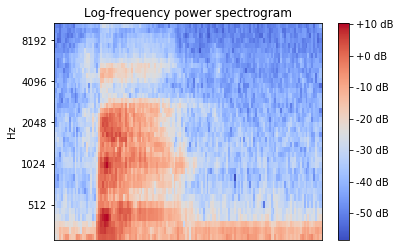

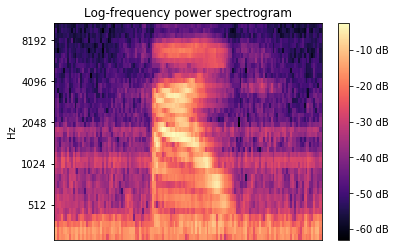

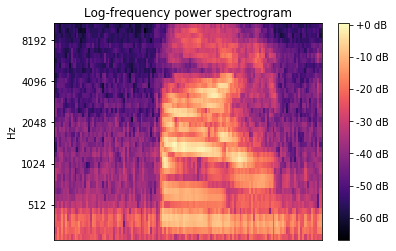

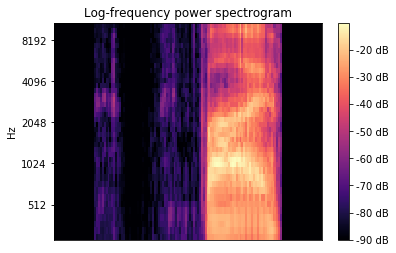

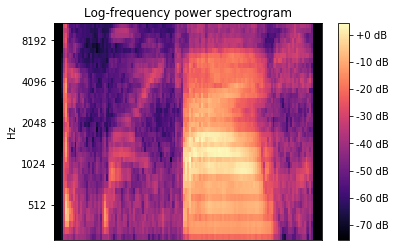

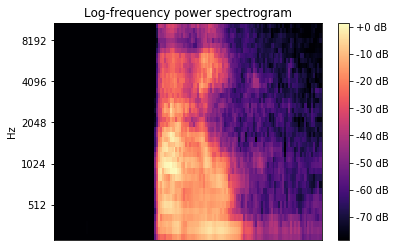

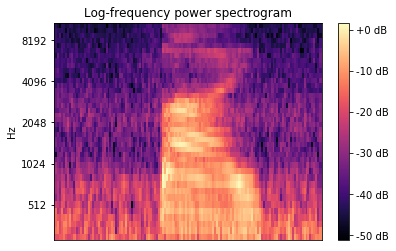

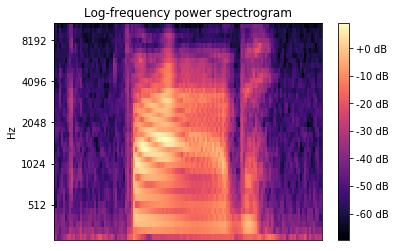

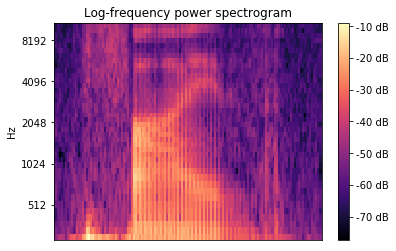

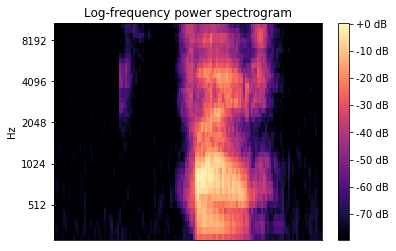

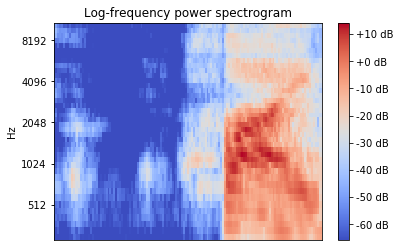

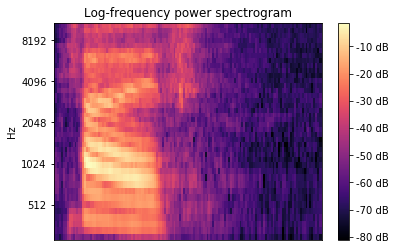

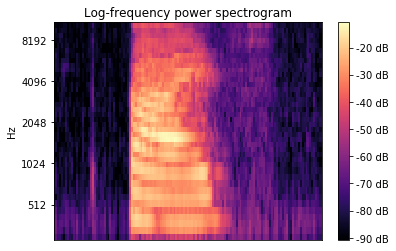

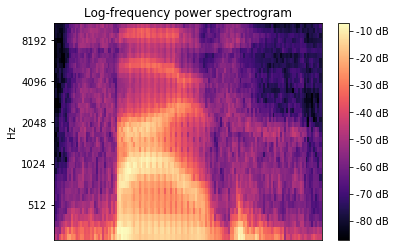

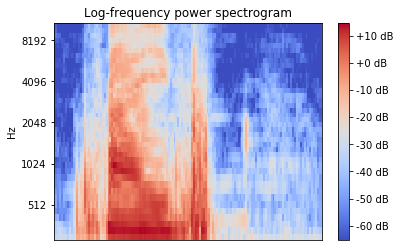

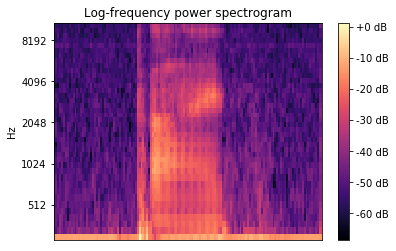

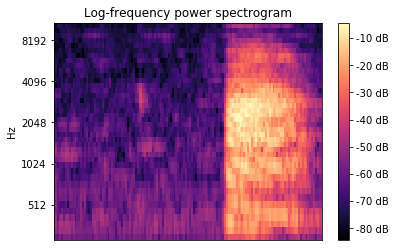

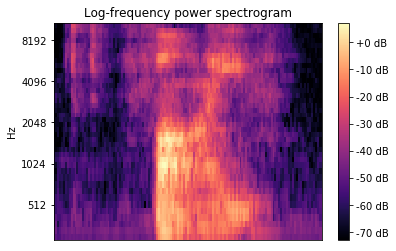

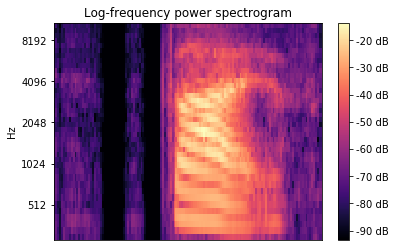

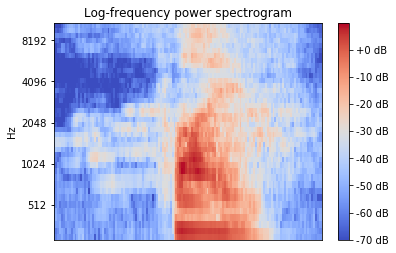

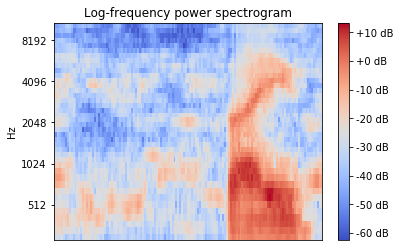

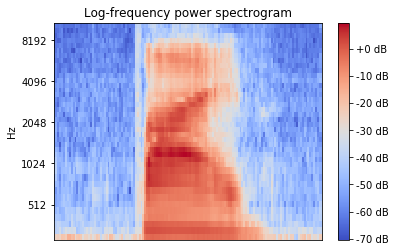

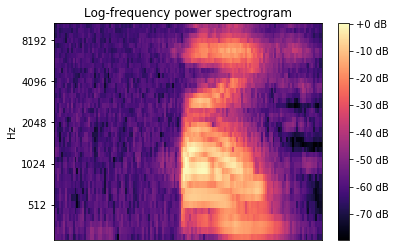

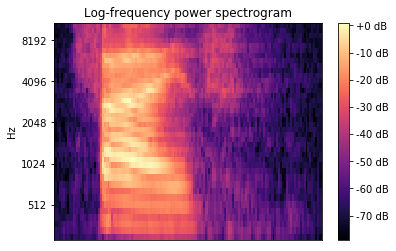

In [12]:
n = 50
start = 200
for mels in X_train[start:start + n]:
    audio_preprocessing.show_melspectrogram(mels)
    plt.show()